In [78]:
import pandas as pd
from openpyxl import load_workbook
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv (r'Nilai_Raport_Kimia.csv')
df

,No,NISN,Nama,L/ P,Harian,PAS/ PAT,Rapor,Predikat,Deskripsi
0,1,68757450,AFIFAH ULYA QURRATA AINI,P,80,80,80,B,Memiliki kemampuan baik terutama kemampuan dal...
1,2,64551214,AGHISTA ZARA SYAVITRI,P,80,80,80,B,Memiliki kemampuan baik terutama kemampuan dal...
2,3,71747289,ANISA SARWAN,P,78,78,78,C,Memiliki kemampuan cukup baik terutama kemampu...
3,4,78066468,AYU FADILAH,P,78,78,78,C,Memiliki kemampuan cukup baik terutama kemampu...
4,5,75951831,CEIS AGISTINA,P,78,78,78,C,Memiliki kemampuan cukup baik terutama kemampu...
...,...,...,...,...,...,...,...,...,...
128,119,40414684,VISTA SYIFA SALIMAH,P,87,87,87,B,Memiliki kemampuan baik terutama kemampuan dal...
129,120,3068557424,WA MIRA,P,88,87,88,B,Memiliki kemampuan baik terutama kemampuan dal...
130,121,49494903,WA NILA,P,88,87,88,B,Memiliki kemampuan baik terutama kemampuan dal...
131,122,38073220,WA ODE RISTA DEWI,P,88,87,88,B,Memiliki kemampuan baik terutama kemampuan dal...


In [80]:
df.columns =['No', 'NISN', 'Nama', 'Jenis_Kelamin', 'Nilai_Harian', 'Nilai_PAS', 'Nilai_Rapor', 'Predikat', 'Deskripsi']
df

,No,NISN,Nama,Jenis_Kelamin,Nilai_Harian,Nilai_PAS,Nilai_Rapor,Predikat,Deskripsi
0,1,68757450,AFIFAH ULYA QURRATA AINI,P,80,80,80,B,Memiliki kemampuan baik terutama kemampuan dal...
1,2,64551214,AGHISTA ZARA SYAVITRI,P,80,80,80,B,Memiliki kemampuan baik terutama kemampuan dal...
2,3,71747289,ANISA SARWAN,P,78,78,78,C,Memiliki kemampuan cukup baik terutama kemampu...
3,4,78066468,AYU FADILAH,P,78,78,78,C,Memiliki kemampuan cukup baik terutama kemampu...
4,5,75951831,CEIS AGISTINA,P,78,78,78,C,Memiliki kemampuan cukup baik terutama kemampu...
...,...,...,...,...,...,...,...,...,...
128,119,40414684,VISTA SYIFA SALIMAH,P,87,87,87,B,Memiliki kemampuan baik terutama kemampuan dal...
129,120,3068557424,WA MIRA,P,88,87,88,B,Memiliki kemampuan baik terutama kemampuan dal...
130,121,49494903,WA NILA,P,88,87,88,B,Memiliki kemampuan baik terutama kemampuan dal...
131,122,38073220,WA ODE RISTA DEWI,P,88,87,88,B,Memiliki kemampuan baik terutama kemampuan dal...


In [81]:
df.isna().sum()

No               0
NISN             0
Nama             0
Jenis_Kelamin    0
Nilai_Harian     0
Nilai_PAS        0
Nilai_Rapor      0
Predikat         0
Deskripsi        0
dtype: int64

In [98]:
x = df[['Nilai_PAS', 'Nilai_Rapor']].as_matrix()
print(x)

[[80 80]
 [80 80]
 [78 78]
 [78 78]
 [78 78]
 [80 80]
 [75 75]
 [80 80]
 [78 78]
 [78 78]
 [78 78]
 [78 79]
 [80 80]
 [70 70]
 [73 73]
 [80 80]
 [72 72]
 [78 78]
 [80 80]
 [75 76]
 [84 84]
 [86 86]
 [74 74]
 [78 78]
 [80 80]
 [73 73]
 [73 73]
 [80 80]
 [80 80]
 [80 80]
 [80 80]
 [76 76]
 [73 73]
 [78 78]
 [80 80]
 [80 80]
 [82 82]
 [80 80]
 [78 78]
 [80 80]
 [80 80]
 [81 82]
 [85 85]
 [78 78]
 [80 80]
 [80 80]
 [80 80]
 [84 84]
 [85 85]
 [87 87]
 [86 86]
 [84 84]
 [88 88]
 [83 83]
 [84 84]
 [84 84]
 [93 93]
 [85 85]
 [94 94]
 [90 90]
 [85 85]
 [84 84]
 [84 84]
 [87 87]
 [84 84]
 [84 84]
 [87 87]
 [87 87]
 [92 92]
 [89 89]
 [83 83]
 [92 92]
 [89 89]
 [85 85]
 [88 88]
 [85 85]
 [88 88]
 [84 84]
 [89 89]
 [86 86]
 [84 85]
 [87 88]
 [86 87]
 [90 90]
 [75 75]
 [83 83]
 [89 89]
 [89 89]
 [ 0 52]
 [88 88]
 [80 80]
 [86 86]
 [86 86]
 [86 86]
 [89 89]
 [86 86]
 [83 83]
 [86 86]
 [89 89]
 [88 88]
 [88 88]
 [88 88]
 [83 83]
 [88 88]
 [75 75]
 [84 84]
 [87 86]
 [88 88]
 [84 83]
 [86 86]
 [88 88]
 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


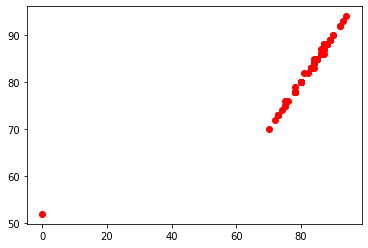

In [99]:
#melihat visualisasi data dari x
plt.plot(x[:,0],x[:,1],'ro')

In [100]:
#inisialisasi nilai cluster 3
kmeans = KMeans(n_clusters=3)

In [101]:
#melakukan clustering dengan data x
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [102]:
cluster = kmeans.cluster_centers_

In [103]:
#melihat pusat cluster 1-3
print(cluster)

[[86.42307692 86.47435897]
 [ 0.         52.        ]
 [78.2037037  78.25925926]]


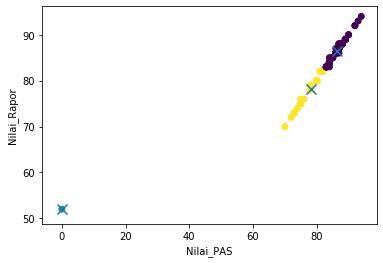

In [104]:
plt.scatter(x[:,0],x[:,1],c=kmeans.labels_,marker='o')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[: , 0], centroids[: , 1], marker = 'x', s = 100, linewidths = 10, zorder = 20)
plt.xlabel('Nilai_PAS')
plt.ylabel('Nilai_Rapor')
plt.show()

In [105]:
y_predicted = kmeans.fit_predict(df[['Nilai_PAS', 'Nilai_Rapor']])
y_predicted

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       2])

In [106]:
df['cluster'] = y_predicted
df

,No,NISN,Nama,Jenis_Kelamin,Nilai_Harian,Nilai_PAS,Nilai_Rapor,Predikat,Deskripsi,cluster
0,1,68757450,AFIFAH ULYA QURRATA AINI,P,80,80,80,B,Memiliki kemampuan baik terutama kemampuan dal...,2
1,2,64551214,AGHISTA ZARA SYAVITRI,P,80,80,80,B,Memiliki kemampuan baik terutama kemampuan dal...,2
2,3,71747289,ANISA SARWAN,P,78,78,78,C,Memiliki kemampuan cukup baik terutama kemampu...,2
3,4,78066468,AYU FADILAH,P,78,78,78,C,Memiliki kemampuan cukup baik terutama kemampu...,2
4,5,75951831,CEIS AGISTINA,P,78,78,78,C,Memiliki kemampuan cukup baik terutama kemampu...,2
...,...,...,...,...,...,...,...,...,...,...
128,119,40414684,VISTA SYIFA SALIMAH,P,87,87,87,B,Memiliki kemampuan baik terutama kemampuan dal...,0
129,120,3068557424,WA MIRA,P,88,87,88,B,Memiliki kemampuan baik terutama kemampuan dal...,0
130,121,49494903,WA NILA,P,88,87,88,B,Memiliki kemampuan baik terutama kemampuan dal...,0
131,122,38073220,WA ODE RISTA DEWI,P,88,87,88,B,Memiliki kemampuan baik terutama kemampuan dal...,0


In [107]:
df.head(50)

,No,NISN,Nama,Jenis_Kelamin,Nilai_Harian,Nilai_PAS,Nilai_Rapor,Predikat,Deskripsi,cluster
0,1,68757450,AFIFAH ULYA QURRATA AINI,P,80,80,80,B,Memiliki kemampuan baik terutama kemampuan dal...,2
1,2,64551214,AGHISTA ZARA SYAVITRI,P,80,80,80,B,Memiliki kemampuan baik terutama kemampuan dal...,2
2,3,71747289,ANISA SARWAN,P,78,78,78,C,Memiliki kemampuan cukup baik terutama kemampu...,2
3,4,78066468,AYU FADILAH,P,78,78,78,C,Memiliki kemampuan cukup baik terutama kemampu...,2
4,5,75951831,CEIS AGISTINA,P,78,78,78,C,Memiliki kemampuan cukup baik terutama kemampu...,2
5,6,78010944,CHINTANY AYSKHA FAYRANA SAFRUDDIN,P,80,80,80,B,Memiliki kemampuan baik terutama kemampuan dal...,2
6,7,67196469,DIAN AL FAIZAH,P,75,75,75,C,Memiliki kemampuan cukup baik terutama kemampu...,2
7,8,71248270,FAJAR BAKTI SUPRAPTO,L,80,80,80,B,Memiliki kemampuan baik terutama kemampuan dal...,2
8,9,74302038,L.M RIZKI FEBRIAWAN RAHMAD,L,78,78,78,C,Memiliki kemampuan cukup baik terutama kemampu...,2
9,10,73869057,L.M. SHAFWAN FEBRIADY,L,78,78,78,C,Memiliki kemampuan cukup baik terutama kemampu...,2
